<a href="https://colab.research.google.com/github/Nikhitha-S-Pavan/mask_detection_yolov3/blob/main/yolo_mask_blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install darknet

In [38]:
!git clone https://github.com/AlexeyAB/darknet.git

fatal: destination path 'darknet' already exists and is not an empty directory.


In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
cd /content/darknet

/content/darknet


In [39]:
cd drive/MyDrive/kaggle_dataset/


/content/drive/MyDrive/kaggle_dataset


In [40]:
!unzip archiveyolo.zip

Archive:  archiveyolo.zip
  inflating: yolo/best.pt            
  inflating: yolo/images/test/102.jpg  
  inflating: yolo/images/test/104.jpg  
  inflating: yolo/images/test/109.jpg  
  inflating: yolo/images/test/110.jpg  
  inflating: yolo/images/test/112.jpg  
  inflating: yolo/images/test/12.jpg  
  inflating: yolo/images/test/125.jpg  
  inflating: yolo/images/test/13.jpg  
  inflating: yolo/images/test/136.jpg  
  inflating: yolo/images/test/145.jpg  
  inflating: yolo/images/test/153.jpg  
  inflating: yolo/images/test/163.jpg  
  inflating: yolo/images/test/164.jpg  
  inflating: yolo/images/test/173.jpg  
  inflating: yolo/images/test/176.jpg  
  inflating: yolo/images/test/18.jpg  
  inflating: yolo/images/test/181.jpg  
  inflating: yolo/images/test/19.jpg  
  inflating: yolo/images/test/195.jpg  
  inflating: yolo/images/test/198.jpg  
  inflating: yolo/images/test/24.jpg  
  inflating: yolo/images/test/27.jpg  
  inflating: yolo/images/test/30.jpg  
  inflating: yolo/image

In [56]:
ls


3rdparty/    CMakeLists.txt          image_yolov4.sh*        README.md
archive.zip  darknet*                include/                results/
backup/      DarknetConfig.cmake.in  json_mjpeg_streams.sh*  scripts/
build/       darknet_images.py       LICENSE                 src/
build.ps1*   darknet.py              Makefile                vcpkg.json
build.sh*    darknet_video.py        net_cam_v3.sh*          video_yolov3.sh*
cfg/         data/                   net_cam_v4.sh*          video_yolov4.sh*
cmake/       image_yolov3.sh*        obj/


/root


[Errno 2] No such file or directory: 'content'
/root


In [57]:
#Configure yolo to use colab resources

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!cat Makefile
!make

GPU=1
CUDNN=1
CUDNN_HALF=1
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# GeForce RTX 3070, 3080, 3090
# ARCH= -gencode arch=compute_86,code=[sm_86,compute_86]

# Kepler GeForce GTX 770, GTX 760, GT 740
# ARCH= -gencode arch=compute_30,code=sm_30

# Tesla A100 (GA100), DGX-A100, RTX 3080
# ARCH= -gencode arch=compute_80,code=[sm_80,compute_80]

# Tesla V100
# ARCH= -gencode arch=compute_7

In [60]:
! ./darknet

usage: ./darknet <function>


## Mask Dataset (Optional)

If you have your own dataset skip this section

In [5]:
cd ..

/content


In [34]:
!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9,es;q=0.8" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/654262%2F1157358%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591250728&Signature=BginBS5b8lsC0UwL5jH2uKZwGxMMyXLyGp5ATUrliu3SNUAj3YrKtAiu%2FkgaEvj%2BGbYEa1NC%2FwKDtlB9eSHxvmLtgGbHTI6KlwTfGcOLER91NZ7lgMq76k7f8Z6XCWeiLFtc%2FVfeP6%2B%2FRL%2F4yULRJVFAzoNpNWtW9SaQ5vS1uVv6s5fKIgYopDyNK4jot%2F%2FNUDEali3RZXAp3HgY3AhZzolwmMBw6Inc%2BDB28baWLS5OtXH2SClGSPfGXflcwbFXiFPAvVn7YcDH4LK4muXVma54jRDSe9aMhbMHaY4VQx5YY%2BF0jB54y3%2BjACcFPPl91WsUcjWoJMNfMYWQEZVG4w%3D%3D" -L -o '654262_1157358_bundle_archive.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   202  100   202    0     0   9619      0 --:--:-- --:--:-- --:--:--  9619


In [62]:
!pwd

/content/darknet


In [59]:
## download https://www.kaggle.com/alexandralorenzo/maskdetection this dataset 

In [64]:
cd yolo

/content/darknet/yolo


In [65]:
!mv labels/test/*.txt images/test/

In [66]:
!mv labels/train/*.txt images/train/

In [67]:
!mv labels/valid/*.txt images/valid/

In [68]:
!sed -i 's/\/kaggle\/input\/maskdetection\/yolo/data/g' test.txt

In [69]:
!sed -i 's/\/kaggle\/input\/maskdetection\/yolo/data/g' train.txt

In [71]:
!sed -i 's/\/kaggle\/input\/maskdetection\/yolo/data/g' valid.txt

In [70]:
!sed -i 's/\/kaggle\/input\/maskdetection\/yolo/data/g' valid.txt

In [72]:
!sed -i 's/\/kaggle\/input\/maskdetection\/yolo\///g' obj.data

In [73]:
cd ..

/content/darknet


In [78]:
!mv  yolo/images/ data/

In [79]:
!mv yolo/train.txt /content/darknet/

In [81]:
!mv yolo/test.txt /content/darknet/

In [82]:
!mv yolo/valid.txt /content/darknet/

In [84]:
!mv yolo/obj.data /content/darknet/

In [85]:
!mv yolo/obj.names /content/darknet/

## Own dataset

If you already have dataset follow given steps

Step1 : Copy image folder in darknet/data folder
    
*   image folder contain train/test/valid folder
*   train folder contain image.jpg image.txt

![alt text](http://blog.ibanyez.info/download/B20190410T000000072.png)

Step2 : Copy your train.txt ,test.txt ,valid.txt , obj.data, obj.names into darknet/ folder


*   Make sure your obj.data contains correct path of train.txt file
*   Make sure your train.txt contains correct path of darknet/data/images file






## Config cfg file

In [87]:
pwd

'/content/darknet'

In [88]:

!sed -i 's/classes=20/classes=2/g' cfg/yolo-voc.2.0.cfg ## change classes=2 with your length of class
!sed -i 's/filters=125/filters=35/g' cfg/yolo-voc.2.0.cfg ## change filters=35 with (classes + 5) * num for me (2 + 5) * 5 = 35 
!cat cfg/yolo-voc.2.0.cfg

[net]
batch=64
subdivisions=8
height=416
width=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.0001
max_batches = 45000
policy=steps
steps=100,25000,35000
scales=10,.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[maxpool]
size=2
stride=2

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=256
size=3
stride=1
pad=1
activation=leaky

[maxp

## Train

In [89]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23

--2021-04-01 05:21:38--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  89.6MB/s    in 0.8s    

2021-04-01 05:21:39 (89.6 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [ ]:
!./darknet detector train obj.data cfg/yolo-voc.2.0.cfg darknet19_448.conv.23 -dont_show 0

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolo-voc
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 8, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x 

## Prediction

To run below codes you have to change


*   labelsPath = "obj.names" ## it is path of obj.names file
*   weightsPath = "backup/yolo-voc_last.weights" ## Here give your last weights file path

*   for i in glob.glob("data/images/test/*.jpg"): ## This the test folder path where you want to test your model



[INFO] loading YOLO from disk...
data/images/test/asian_mask198.jpg


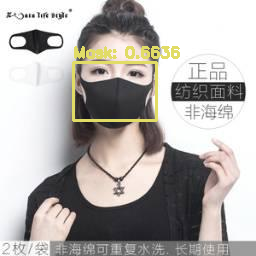

data/images/test/new_14.jpg


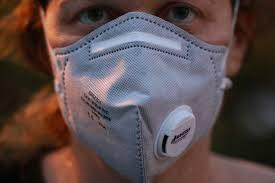

data/images/test/asian_mask35.jpg


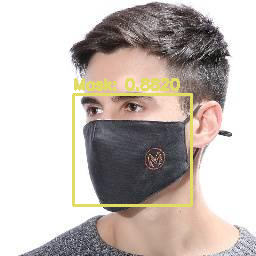

data/images/test/asian_mask87.jpg


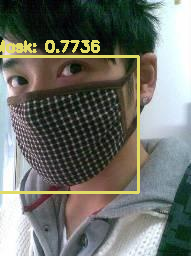

data/images/test/new_257.jpg


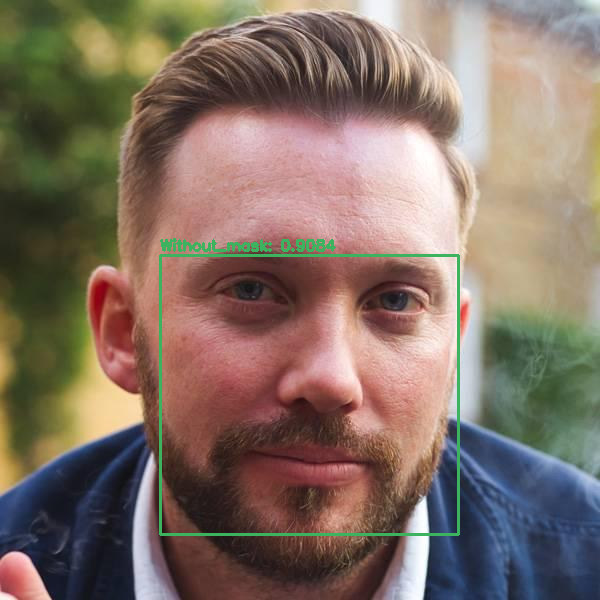

In [ ]:
import numpy as np
import argparse
import imutils
import time
import cv2
import glob
import os
from google.colab.patches import cv2_imshow


labelsPath = "obj.names"
LABELS = open(labelsPath).read().strip().split("\n")


np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")


weightsPath = "backup/yolo-voc_last.weights"
configPath = "cfg/yolo-voc.2.0.cfg"

print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]


for i in glob.glob("data/images/test/*.jpg")[:5]:
  print(i)
  frame = cv2.imread(i)
  (H, W) = frame.shape[:2]

  # construct a blob from the input frame and then perform a forward
  # pass of the YOLO object detector, giving us our bounding boxes
  # and associated probabilities
  blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),
    swapRB=True, crop=False)
  net.setInput(blob)
  start = time.time()
  layerOutputs = net.forward(ln)
  end = time.time()

  # initialize our lists of detected bounding boxes, confidences,
  # and class IDs, respectively
  boxes = []
  confidences = []
  classIDs = []

  # loop over each of the layer outputs
  for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
      # extract the class ID and confidence (i.e., probability)
      # of the current object detection
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]

      # filter out weak predictions by ensuring the detected
      # probability is greater than the minimum probability
      if confidence > 0.5:
        # scale the bounding box coordinates back relative to
        # the size of the image, keeping in mind that YOLO
        # actually returns the center (x, y)-coordinates of
        # the bounding box followed by the boxes' width and
        # height
        box = detection[0:4] * np.array([W, H, W, H])
        (centerX, centerY, width, height) = box.astype("int")

        # use the center (x, y)-coordinates to derive the top
        # and and left corner of the bounding box
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))

        # update our list of bounding box coordinates,
        # confidences, and class IDs
        boxes.append([x, y, int(width), int(height)])
        confidences.append(float(confidence))
        classIDs.append(classID)

  # apply non-maxima suppression to suppress weak, overlapping
  # bounding boxes
  idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,
    0.5)

  # ensure at least one detection exists
  if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
      # extract the bounding box coordinates
      (x, y) = (boxes[i][0], boxes[i][1])
      (w, h) = (boxes[i][2], boxes[i][3])

      # draw a bounding box rectangle and label on the frame
      color = [int(c) for c in COLORS[classIDs[i]]]
      cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
      text = "{}: {:.4f}".format(LABELS[classIDs[i]],
        confidences[i])
      cv2.putText(frame, text, (x, y - 5),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
  cv2_imshow(frame)
  
    

For better prediction you have to train more epochs